Where are the fuji TF galaxies on the sky?

This notebook is based off of Khaled Said's notebook `fuji_aitoff.ipynb` (KSaid-1: DESI_fuji_FP/fuji_aitoff.ipynb)

In [1]:
import numpy as np

from astropy.table import Table
from astropy.coordinates import SkyCoord, ICRS
import astropy.units as u

import ligo.skymap.plot
import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# Data

## DESI fuji

In [2]:
# fuji = Table.read('SGA_fuji_ITFR_moduli.fits')
fuji = Table.read('SGA_fuji_jointTFR-varyV0-perpdwarf_moduli.fits')
fuji[:5]

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,Z_DESI,ZERR_DESI,V_0p33R26,V_0p33R26_err,TARGETID,PHOTSYS,R_MAG_SB26_CORR,R_MAG_SB26_ERR_CORR,R_ABSMAG_SB26,R_ABSMAG_SB26_err,R_ABSMAG_SB26_CORR,R_ABSMAG_SB26_CORR_err,R_ABSMAG_SB26_TFbright,R_ABSMAG_SB26_TFbright_err,mu_TFbright,mu_TFbright_err
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64,float64,float64,float64,int64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
896,SGA-2020 896,PGC1190469,1190469,180.38184750000002,1.2958311000000002,Sc,76.42,0.44771332,0.7726806,0.022478215,23.47448,16.591,False,LEDA-20181114,256,PGC1190469,1,True,180.38184750000002,1.2958311000000002,0.44771332,1803p012,180.38182702766252,1.2958268307578154,0.6239483,SB26,76.93204,0.79918337,180.38178401011206,1.295990493861164,16.25661,7.6343946,7.3312407,7.215459,4.267071,6.71145,8.98399,11.085844,12.783826,14.283976,15.799797,17.191736,18.718449,18.022089,17.380363,16.982048,17.370085,16.760023,16.377943,16.967363,16.3918,16.024693,16.728146,16.17214,15.817478,16.609686,16.06539,15.715597,16.54587,16.008068,15.658699,16.505327,15.967604,15.619181,16.48057,15.942226,15.594475,16.459711,15.924162,15.572447,0.02403138,0.037713606,0.06752815,0.0597593,0.041663416,0.057950046,0.06897008,0.07238169,0.11818266,0.0070740557,0.008179923,0.008415725,0.005835994,0.006626628,0.0068130954,0.0056522293,0.006152283,0.0062183426,0.0057331356,0.0059468574,0.0059097866,0.005547482,0.0057424223,0.005712396,0.005370375,0.0055686547,0.005550764,0.0052407323,0.0054267743,0.0054291883,0.0051505533,0.005328927,0.0

## ALFALFA

In [3]:
alfalfa = Table.read('/pscratch/sd/k/kadglass/data/a100.code12.table2.190808.txt', 
                     format='ascii.csv')
alfalfa[:5]

AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
int64,str8,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64
105367,........,0.00167,5.44333,0.00333,5.4425,11983,274,39,281,1.14,0.08,8.1,1.91,166.0,2.3,9.87,0.05,1
333313,........,0.00375,24.90889,359.9975,24.9075,11181,313,20,333,1.8,0.09,11.3,2.02,154.8,2.3,10.01,0.05,1
331060,478-009b,0.01042,23.08472,0.01417,23.0875,4463,160,4,184,1.96,0.07,14.7,2.35,50.6,10.4,9.07,0.18,1
331061,456-013.,0.01042,15.87222,0.00875,15.88167,6007,260,45,268,1.13,0.09,6.5,2.4,85.2,2.4,9.29,0.06,1
104570,........,0.00667,32.70834,0.005,32.71028,10614,245,6,250,0.86,0.07,6.6,1.86,147.0,2.3,9.64,0.06,1


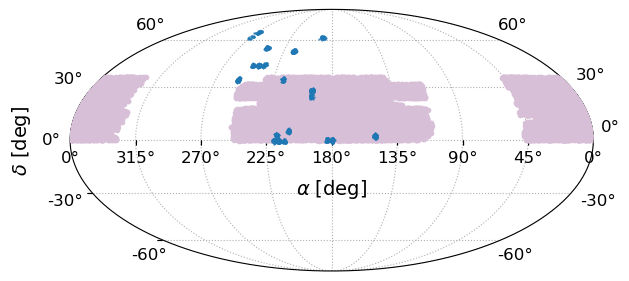

In [4]:
plt.figure(tight_layout=True)

ax = plt.subplot(111, projection='astro degrees mollweide')

ax.plot(alfalfa['RAdeg_HI'], 
        alfalfa['DECdeg_HI'], 
        '.', 
        c='thistle', 
        transform=ax.get_transform('world'), 
        label='ALFALFA')
ax.plot(fuji['RA'], 
        fuji['DEC'], 
        '.', 
        ms=1, 
        c='tab:blue', 
        transform=ax.get_transform('world'), 
        label='DESI EDR')

plt.grid(linestyle=':')

plt.tick_params(axis='both', which='major', labelsize=12)

# plt.legend()

ax.set_xlabel(r'$\alpha$ [deg]', fontsize=14)
ax.set_ylabel(r'$\delta$ [deg]', fontsize=14);

# plt.savefig('../../Figures/SV/fuji_ALFALFA_sky.png', dpi=150, facecolor='none');

# Make the same plot, but with DESI's tools

In [6]:
from matplotlib.projections import get_projection_names

from desiutil.plots import init_sky

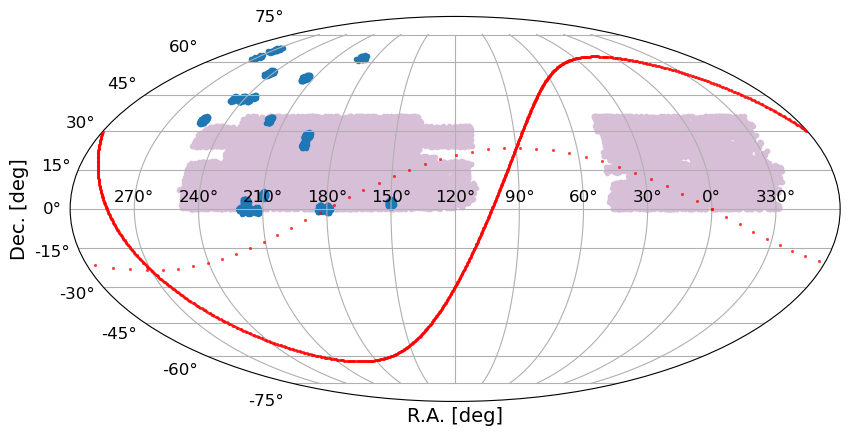

In [18]:
ax = init_sky()

ax.scatter(ax.projection_ra(alfalfa['RAdeg_HI']), 
           ax.projection_dec(alfalfa['DECdeg_HI']), 
           marker='.', 
           color='thistle', 
           label='ALFALFA')
ax.scatter(ax.projection_ra(fuji['RA']), 
           ax.projection_dec(fuji['DEC']), 
           marker='.', 
           color='tab:blue', 
           label='DESI EDR')

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

plt.tick_params(axis='both', which='major', labelsize=12);

plt.savefig('../../Figures/SV/fuji_ALFALFA_sky-DESI.png', dpi=150, facecolor='none');